In [ ]:
# IMPORT MODULES
import sys
from os.path import join
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.applications import resnet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
#from tensorflow.python.keras.applications import ResNet50

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils, to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications import ResNet50
import keras
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras import applications
import tensorflow as tf
import tensorflow.keras.preprocessing.image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D, UpSampling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import RMSprop
import os

In [ ]:
b = np.load('/content/breastmnist (1).npz')

In [ ]:
print(b.files)

['train_images', 'val_images', 'test_images', 'train_labels', 'val_labels', 'test_labels']


In [ ]:
x_train = b['train_images']
#x_train = np.expand_dims(x_train, axis = 3)
x_train = np.stack((x_train,)*3, axis=-1)
y_train = b['train_labels']
#y_train = to_categorical(y_train, 2)

val_images = b['val_images']
val_images = np.stack((val_images,)*3, axis=-1)
#val_images = np.expand_dims(val_images, axis = 3)
val_labels = b['val_labels']
#val_labels = to_categorical(val_labels, 2)

x_test = b['test_images']
x_test = np.stack((x_test,)*3, axis=-1)
#x_test = np.expand_dims(x_test, axis = 3)
y_test = b['test_labels']
x_train.shape, x_test.shape

((546, 28, 28, 3), (156, 28, 28, 3))

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [ ]:
train_datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
train_datagen.fit(x_train)

val_datagen = ImageDataGenerator()
val_datagen.mean = train_datagen.mean
val_datagen.std = train_datagen.std

test_datagen = ImageDataGenerator()
test_datagen.mean = train_datagen.mean
test_datagen.std = train_datagen.std

train_generator = train_datagen.flow(x_train, y_train, batch_size=64)
val_generator = val_datagen.flow(val_images, val_labels)
test_generator = test_datagen.flow(x_test, y_test)


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers.experimental.preprocessing import Resizing

pretrained_Resnet = ResNet50( input_shape=(None,None,3),
                                  include_top=False,
                                  weights='imagenet',
                                  classes=2,
                                   )
# for layer in pretrained_Resnet.layers:
#      layer.trainable = False

Resnet50_model = Sequential()
# Resnet50_model.add(BatchNormalization())
Resnet50_model.add(Resizing(64,64))
# Resnet50_model.add(UpSampling2D(size=(7,7)))
Resnet50_model.add(pretrained_Resnet)
# for layer in pretrained_Resnet.layers:
#     Resnet50_model.add(layer)
for layer in Resnet50_model.layers:
    layer.trainable = False
# Resnet50_model.add(GlobalAveragePooling2D())
Resnet50_model.add(Flatten())
Resnet50_model.add(Dense(1024, activation='relu', name='hidden1'))
Resnet50_model.add(BatchNormalization())
Resnet50_model.add(Dropout(0.5))
Resnet50_model.add(Dense(512, activation='relu', name='hidden2'))
Resnet50_model.add(BatchNormalization())
Resnet50_model.add(Dropout(0.5))
Resnet50_model.add(Dense(2, activation='sigmoid', name='predictions'))

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
Resnet50_model.compile(
#     loss='sparse_categorical_crossentropy'
    loss='binary_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

# Callback to save the Keras model or model weights at some frequency.
checkpointer = ModelCheckpoint(
    filepath='Resnet50.h5', verbose=1, save_best_only=True)

history_Res_1 = Resnet50_model.fit(
    train_generator,
    epochs=200,
    verbose=1,
    callbacks=[checkpointer],
    validation_data=val_generator,
    shuffle=True
)

Epoch 1/200
9/9 [==============================] - ETA: 0s - loss: 0.0594 - accuracy: 0.9707
Epoch 1: val_loss improved from inf to 40.19323, saving model to Resnet50.h5
9/9 [==============================] - 6s 243ms/step - loss: 0.0594 - accuracy: 0.9707 - val_loss: 40.1932 - val_accuracy: 0.3974
Epoch 2/200
9/9 [==============================] - ETA: 0s - loss: 0.0230 - accuracy: 0.9945
Epoch 2: val_loss did not improve from 40.19323
9/9 [==============================] - 0s 47ms/step - loss: 0.0230 - accuracy: 0.9945 - val_loss: 40.3810 - val_accuracy: 0.4103
Epoch 3/200
9/9 [==============================] - ETA: 0s - loss: 0.0397 - accuracy: 0.9872
Epoch 3: val_loss did not improve from 40.19323
9/9 [==============================] - 0s 40ms/step - loss: 0.0397 - accuracy: 0.9872 - val_loss: 41.5004 - val_accuracy: 0.3846
Epoch 4/200
9/9 [==============================] - ETA: 0s - loss: 0.0192 - accuracy: 0.9890
Epoch 4: val_loss did not improve from 40.19323
9/9 [==============

Text(0.5, 1.0, 'Accuracy Curves')

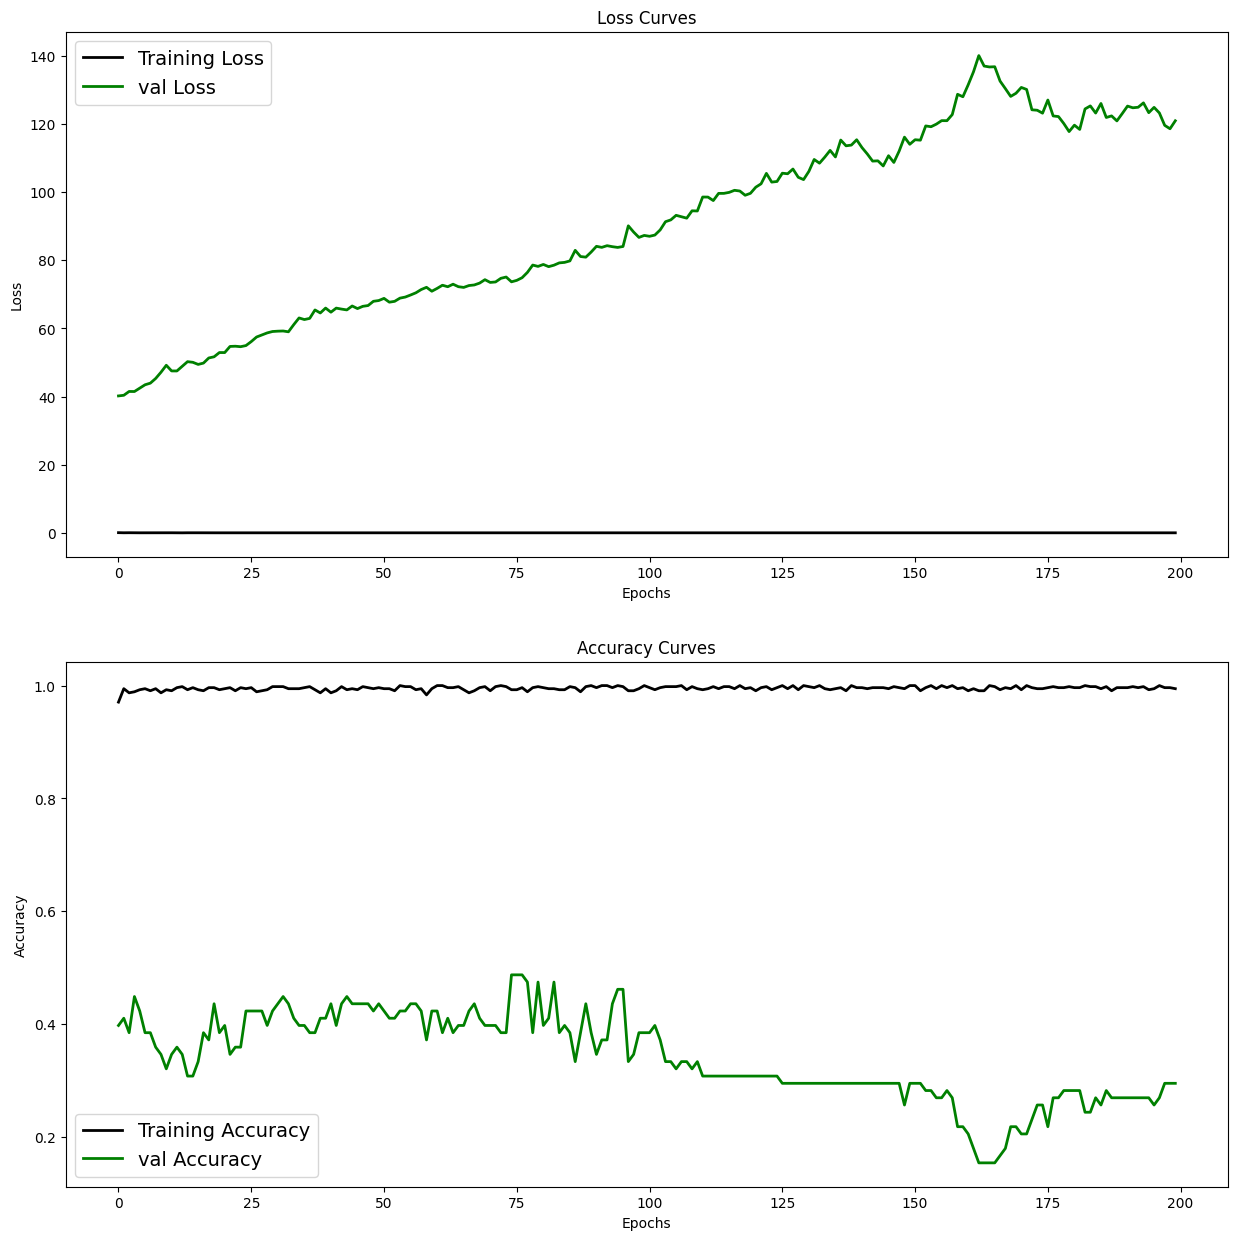

In [ ]:

## Loss curve
plt.figure(figsize=[15,15])
plt.subplot(211)
plt.plot(history_Res_1.history['loss'], 'black', linewidth=2.0)
plt.plot(history_Res_1.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'val Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)
## Acc curve
plt.subplot(212)
plt.plot(history_Res_1.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history_Res_1.history['val_accuracy'], 'green', linewidth=2.0)
plt.legend(['Training Accuracy', 'val Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [ ]:
test_loss, test_acc = Resnet50_model.evaluate(x_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

5/5 [==============================] - 2s 156ms/step - loss: 0.6400 - accuracy: 0.7244
Test loss: 0.6400378942489624
Test accuracy: 0.7243589758872986


In [ ]:
# Assuming you have a model, test data and labels
# Predict probabilities
y_pred = Resnet50_model.predict(x_test)
# Convert probabilities into class labels
y_pred = np.argmax(y_pred, axis=1)
# Convert true labels into class labels if they are one-hot encoded
y_test = np.argmax(y_test, axis=1)
# Import scikit-learn
from sklearn.metrics import confusion_matrix
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Print confusion matrix
print(cm)

5/5 [==============================] - 1s 21ms/step
[[20 22]
 [21 93]]
